In [1]:
import numpy as np
import scipy.sparse
from utils import *
from data import *
import matplotlib.pyplot as plt
import networkx as nx
import pickle


In [ ]:
file_tuple = ("datasets/download.tsv.opsahl-ucsocial.tar.bz2", "opsahl-ucsocial/out.opsahl-ucsocial")
data_uci = Dataset_UCI(file_tuple)


In [ ]:
data_sbm = Dataset_SBM("datasets/sbm_50t_1000n_adj.csv")

In [ ]:
# data_as = Dataset_AS("datasets/as_data")
with open("datasets/as_data/ASdata_class", "rb") as f:
    data_as = pickle.load(f)

In [ ]:
data_bitcoin = Dataset_BitCoin("datasets/soc-sign-bitcoinotc.csv")

In [2]:
data_RM = Dataset_RM(("datasets/download.tsv.mit.tar.bz2", "mit/out.mit"))

loading graph at time stamp 0
loading graph at time stamp 1
loading graph at time stamp 2
loading graph at time stamp 3
loading graph at time stamp 4
loading graph at time stamp 5
loading graph at time stamp 6
loading graph at time stamp 7
loading graph at time stamp 8
loading graph at time stamp 9
loading graph at time stamp 10
loading graph at time stamp 11
loading graph at time stamp 12
loading graph at time stamp 13
loading graph at time stamp 14
loading graph at time stamp 15
loading graph at time stamp 16
loading graph at time stamp 17
loading graph at time stamp 18
loading graph at time stamp 19
loading graph at time stamp 20
loading graph at time stamp 21
loading graph at time stamp 22
loading graph at time stamp 23
loading graph at time stamp 24
loading graph at time stamp 25
loading graph at time stamp 26
loading graph at time stamp 27
loading graph at time stamp 28
loading graph at time stamp 29
loading graph at time stamp 30
loading graph at time stamp 31
loading graph at t

In [ ]:
def normalizeAdjacency(W):
    """
    NormalizeAdjacency: Computes the degree-normalized adjacency matrix

    Input:

        W (np.array): adjacency matrix

    Output:

        A (np.array): degree-normalized adjacency matrix
    """
    # Check that the matrix is square
    assert W.shape[0] == W.shape[1]
    # Compute the degree vector
    d = np.sum(W, axis = 1)
    # Invert the square root of the degree
    d = 1/np.sqrt(d)
    # And build the square root inverse degree matrix
    D = np.diag(d)
    # Return the Normalized Adjacency
    return D @ W @ D 

In [3]:
def cos_similarity(A1, A2):
    N = min(A1.shape[0], A2.shape[0])
    A1_flatten = A1[:N, :N].reshape(-1, 1)
    A2_flatten = A2[:N, :N].reshape(-1, 1)
    A1_upper = A1_flatten.tocsr()[: A1_flatten.shape[0] // 2]
    A2_upper = A2_flatten.tocsr()[: A2_flatten.shape[0] // 2]
    return A1_upper.multiply(A2_upper).sum() / (
        scipy.sparse.linalg.norm(A1_upper) * scipy.sparse.linalg.norm(A2_upper)
    )

def pearson_coeff(A1, A2):
    A1 = A1.toarray()
    A2 = A2.toarray()
    N = min(A1.shape[0], A2.shape[0])
    A1_flatten = A1[:N, :N].flatten()
    A2_flatten = A2[:N, :N].flatten()
    A1_upper = A1_flatten[: A1_flatten.shape[0] // 2]
    A2_upper = A2_flatten[: A2_flatten.shape[0] // 2]
    return scipy.stats.pearsonr(A1_upper, A2_upper)[0]


In [ ]:
sbm_time_list = [9, 19, 29, 39, 49]
sbm_sim = np.zeros([len(sbm_time_list), 10])
for idx in range(len(sbm_time_list)):
    t = sbm_time_list[idx]
    print("the cos similarity of time stamp %d and it's past 10 times: " %(t+1))
    for i in range(10):
        sbm_sim[idx, i] = cos_similarity(data_sbm.A_list[t-i], data_sbm.A_list[t])
        print("%.3f" %(sbm_sim[idx, i]), end=" ")
        # print(pearson_coeff(data1.A_list[t-i], data1.A_list[t]))
    print()

In [ ]:
t_stamps = np.linspace(0, -9, num=10)
plt.plot(t_stamps, sbm_sim.T)
plt.legend(["time stamp " + str(t+1) for t in sbm_time_list])
plt.xticks(t_stamps)
plt.title("SBM, similarity with the past")
plt.show()
# plt.ylim([0,1])


In [ ]:
uci_time_list = [9, 19, 29, 39, 49, 59, 69, 79, 86]
uci_sim = np.zeros([len(uci_time_list), 10])
for idx in range(len(uci_time_list)):
    t = uci_time_list[idx]
    print("the cos similarity of time stamp %d and it's past 10 times: " %(t+1))
    for i in range(10):
        uci_sim[idx, i] = cos_similarity(data_uci.A_list[t-i], data_uci.A_list[t])
        print("%.3f" %(uci_sim[idx, i]), end=" ")
        # print(pearson_coeff(data1.A_list[t-i], data1.A_list[t]))
    print()

In [ ]:
t_stamps = np.linspace(0, -9, num=10)
plt.plot(t_stamps, uci_sim.T)
plt.legend(["time stamp " + str(t+1) for t in uci_time_list])
plt.xticks(t_stamps)
plt.title("UCI, similarity with the past")
plt.show()
# plt.ylim([0,1])


In [ ]:
as_time_list = [9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
as_sim = np.zeros([len(as_time_list), 10])
for idx in range(len(as_time_list)):
    t = as_time_list[idx]
    print("the cos similarity of time stamp %d and it's past 10 times: " %(t+1))
    for i in range(10):
        as_sim[idx, i] = cos_similarity(data_as.A_list[t-i], data_as.A_list[t])
        print("%.3f" %(as_sim[idx, i]), end=" ")
        # print(pearson_coeff(data1.A_list[t-i], data1.A_list[t]))
    print()

In [ ]:
t_stamps = np.linspace(0, -9, num=10)
plt.plot(t_stamps, as_sim.T)
plt.legend(["time stamp " + str(t+1) for t in as_time_list])
plt.xticks(t_stamps)
plt.title("AS, similarity with the past")
plt.show()
# plt.ylim([0,1])


In [ ]:
bitcoin_time_list = [9, 29, 49, 69, 89, 109, 129, 133]
bitcoin_sim = np.zeros([len(bitcoin_time_list), 10])
for idx in range(len(bitcoin_time_list)):
    t = bitcoin_time_list[idx]
    print("the cos similarity of time stamp %d and it's past 10 times: " %(t+1))
    for i in range(10):
        bitcoin_sim[idx, i] = cos_similarity(data_bitcoin.A_list[t-i], data_bitcoin.A_list[t])
        print("%.3f" %(bitcoin_sim[idx, i]), end=" ")
        # print(pearson_coeff(data1.A_list[t-i], data1.A_list[t]))
    print()

In [ ]:
bitcoin_nodes = [A.shape[0] for A in data_bitcoin.A_list]
bitcoin_edges = [A.nnz for A in data_bitcoin.A_list]
plt.plot(np.arange(134), bitcoin_nodes, label="# nodes")
plt.plot(np.arange(134), bitcoin_edges, label="# edges")
plt.legend()
plt.show()

In [4]:
RM_time_list = [9, 19, 29, 39, 49, 59, 69, 79, 89]
RM_sim = np.zeros([len(RM_time_list), 10])
for idx in range(len(RM_time_list)):
    t = RM_time_list[idx]
    print("the cos similarity of time stamp %d and it's past 10 times: " %(t+1))
    for i in range(10):
        RM_sim[idx, i] = cos_similarity(data_RM.A_list[t-i], data_RM.A_list[t])
        print("%.3f" %(RM_sim[idx, i]), end=" ")
        # print(pearson_coeff(data1.A_list[t-i], data1.A_list[t]))
    print()

the cos similarity of time stamp 10 and it's past 10 times: 
1.000 0.536 0.364 0.368 0.395 0.298 0.355 0.341 0.294 0.228 
the cos similarity of time stamp 20 and it's past 10 times: 
1.000 0.482 0.461 0.457 0.377 0.365 0.354 0.239 0.379 0.359 
the cos similarity of time stamp 30 and it's past 10 times: 
1.000 0.218 0.541 0.560 0.599 0.574 0.433 0.522 0.525 0.426 
the cos similarity of time stamp 40 and it's past 10 times: 
1.000 0.175 0.236 0.183 0.122 0.062 0.128 0.089 0.106 0.066 
the cos similarity of time stamp 50 and it's past 10 times: 
1.000 0.389 0.443 0.362 0.341 0.397 0.375 0.000 0.000 0.000 
the cos similarity of time stamp 60 and it's past 10 times: 
1.000 0.410 0.512 0.338 0.301 0.358 0.341 0.364 0.421 0.343 
the cos similarity of time stamp 70 and it's past 10 times: 
1.000 0.613 0.482 0.331 0.450 0.453 0.397 0.364 0.218 0.345 
the cos similarity of time stamp 80 and it's past 10 times: 
1.000 0.554 0.424 0.311 0.269 0.161 0.312 0.228 0.298 0.187 
the cos similarity of ti

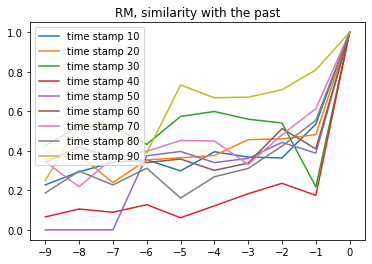

In [5]:
t_stamps = np.linspace(0, -9, num=10)
plt.plot(t_stamps, RM_sim.T)
plt.legend(["time stamp " + str(t+1) for t in RM_time_list])
plt.xticks(t_stamps)
plt.title("RM, similarity with the past")
plt.show()
# plt.ylim([0,1])

In [ ]:
bitcoin_graph_list = []
for i in range(len(data_bitcoin)):
    bitcoin_graph_list.append(nx.from_numpy_matrix(data_bitcoin.A_list[i]))

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), dpi=300)
for row in range(4):
    for column in range(5):
        G = bitcoin_graph_list[10 + 5 * row + column]
        pos = nx.spring_layout(G)
        color_map = []
        for node in G:
            if node in nx.isolates(G):
                color_map.append('red')
            else: 
                color_map.append('blue')
        nx.draw(G, pos, ax=axes[row, column], node_size=3, node_color=color_map, alpha=0.7)
        axes[row, column].set_title("time stamp " + str(10 + 5 * row + column))


In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), dpi=300)
for row in range(4):
    for column in range(5):
        G = bitcoin_graph_list[10 + 5 * row + column]
        G.remove_nodes_from(list(nx.isolates(G)))
        pos = nx.spring_layout(G)
        color_map = []
        nx.draw(G, pos, ax=axes[row, column], node_size=3, node_color="b", alpha=0.7)
        axes[row, column].set_title("time stamp " + str(10 + 5 * row + column))
